<a href="https://colab.research.google.com/github/SJinLee/XAI2023/blob/main/k1.car_truck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* linux OS version

In [ ]:
!lsb_release -r

Release:	22.04


* OS 정보

In [ ]:
!cat /etc/os-release

PRETTY_NAME="Ubuntu 22.04.2 LTS"
NAME="Ubuntu"
VERSION_ID="22.04"
VERSION="22.04.2 LTS (Jammy Jellyfish)"
VERSION_CODENAME=jammy
ID=ubuntu
ID_LIKE=debian
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
UBUNTU_CODENAME=jammy


* [kaggle](https://www.kaggle.com) data download:
    * kaggle의 [computer vision course](https://www.kaggle.com/learn/computer-vision)에서 download한다.
    * Car or Truck: https://www.kaggle.com/datasets/ryanholbrook/car-or-truck
    * computer vision resources: https://www.kaggle.com/datasets/ryanholbrook/computer-vision-resources
    * CV course models: https://www.kaggle.com/datasets/ryanholbrook/cv-course-models
    * 각각을 car_or_truck.zip, computer_vision_resources.zip, base_models.zip에 저장한다

* google 드라이브에 upload
    * 내드라이브에 xai폴더를 만들고
    * kaggle에서 받은 zip파일들을 upload한다.
    * colab에서 구글드라이브를 연결한다.

In [ ]:
!unzip drive/MyDrive/xai/car_or_truck.zip

In [ ]:
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed(31415)

In [ ]:
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore")

* 데이터를 공급하는 pipeline 만들기

In [ ]:
ds_train_ = image_dataset_from_directory(
    'train',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)

Found 5117 files belonging to 2 classes.


In [ ]:
ds_valid_ = image_dataset_from_directory(
    'valid',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

Found 5051 files belonging to 2 classes.


In [ ]:
for a in ds_train_:
    break

In [ ]:
len(a)

2

In [ ]:
len(a[0])

64

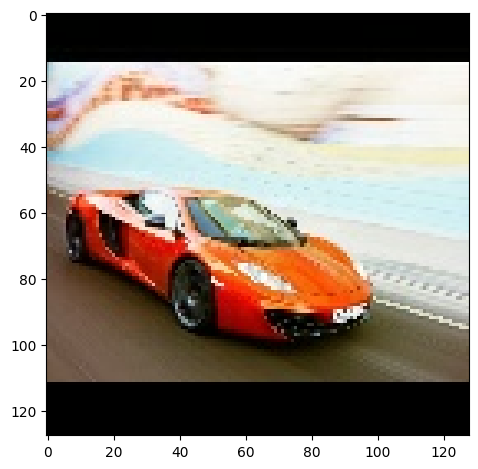

In [ ]:
plt.imshow(a[0][1].numpy())

In [ ]:
len(a[1])

64

In [ ]:
a[1][1]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>

* a[1]은 64개의 label 값인데, 0은 car, 1은 truck을 의미한다.
* a[0]은 64개의 image이다. 크기는 128x128이고 rgb로 색을 표시한다.

In [ ]:
for b in ds_valid_:
    break

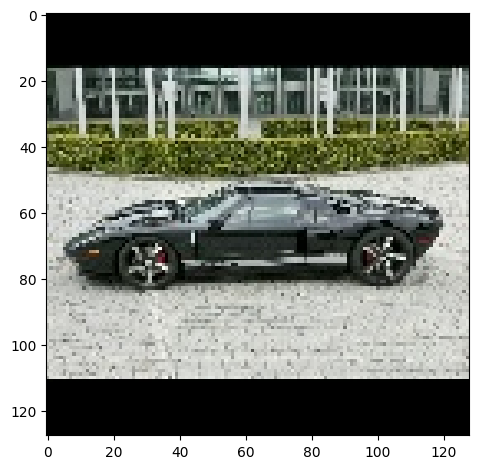

In [ ]:
plt.imshow(b[0][1].numpy())

In [ ]:
b[1][1].numpy()

array([0.], dtype=float32)

In [ ]:
b[1].numpy().reshape((64,))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
a[1].numpy().reshape((64,))

array([1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [ ]:
a[0][0]

<tf.Tensor: shape=(128, 128, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>

In [ ]:
# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

* pretrainde model 불러오기

In [ ]:
!unzip drive/MyDrive/xai/base_models.zip

In [ ]:
pretrained_base = tf.keras.models.load_model(
    'cv-course-models/vgg16-pretrained-base',
)
pretrained_base.trainable = False

* 인공신경망 모델 만들기

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    pretrained_base,
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

* 인공신경망 학습

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=30,
    verbose=1,
)